In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('car_age_price.csv')
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


Check for null values


In [6]:
df.isna().sum()

Year     0
Price    0
dtype: int64

Boxplot to check outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7ce3d5368640>,
 'caps': [<matplotlib.lines.Line2D at 0x7ce3d5369570>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ce3d5369a20>],
 'medians': [<matplotlib.lines.Line2D at 0x7ce3d5369b40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ce3d5369e10>],
 'means': []}

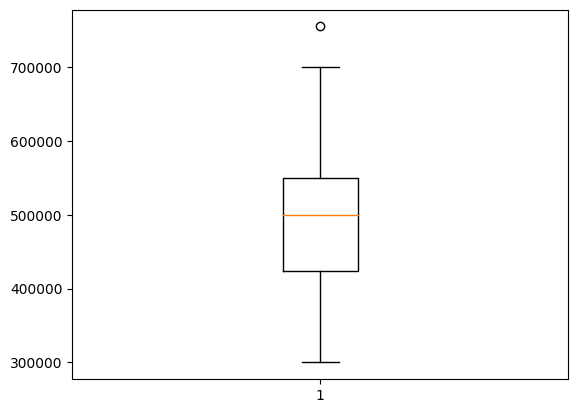

In [ ]:
plt.boxplot(df['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ce3d53e5b40>,
 'caps': [<matplotlib.lines.Line2D at 0x7ce3d53e6080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ce3d53e58a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ce3d53e65c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ce3d5244100>],
 'means': []}

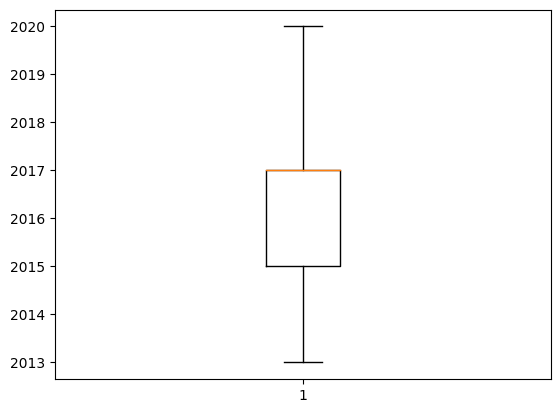

In [ ]:
plt.boxplot(df['Year'])

No much outliers detected, below is a scatter plot

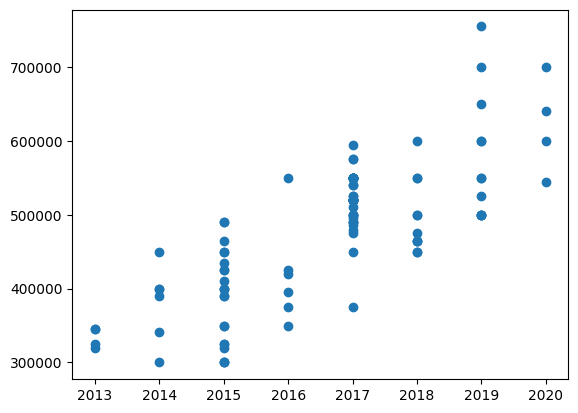

In [8]:
plt.scatter(df['Year'],df['Price'],)

**LINEAR REGRESSION**

In [56]:
X = df.drop(['Price'],axis = 1)
y = df['Price']

Giving a few values for test size in order to find the best linear relationship.

In [103]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
r2 = []
test_values = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
print('R2 scores for following test scores:-\n')
for i in test_values:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= i,random_state=42)
    lr = linear_model.LinearRegression()
    model = lr.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(i,':',r2_score(y_test,predictions))
    print(' ')
    r2.append(r2_score(y_test,predictions))
    best_score = r2[0]
for i in test_values:
  if best_score < r2[test_values.index(i)]:
    best_score =  r2[test_values.index(i)]
    best = i
print('The test size which gives the best linear relationship is : ',best)


R2 scores for following test scores:-

0.1 : 0.37075450283857203
 
0.15 : 0.3878799252095517
 
0.2 : 0.36759313425902185
 
0.25 : 0.4347961632108023
 
0.3 : 0.4887760028600123
 
0.35 : 0.5318565099882668
 
0.4 : 0.4811009080887487
 
0.45 : 0.4722351331412813
 
The test size which gives the best linear relationship is :  0.35


In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= best,random_state=42)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
price = model.predict(pd.DataFrame([2022]))
print('The price for 2022 model Hyundai grand i10 is predicted to be INR',price[0])

The price for 2022 model Hyundai grand i10 is predicted to be INR 734996.7350187153


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**LASSO**

In [110]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ls_model = lasso.fit(X_train,y_train)
ls_pred = ls_model.predict(X_test)

Comparison between 2 models

In [111]:
r = r2_score(y_test,ls_pred)
print('Lasso r2 score: ',r2_score(y_test,ls_pred))

Lasso r2 score:  0.5318585010255776


In [115]:
if r>r2[test_values.index(best)]:
  print('Lasso regression performs better')
elif(r<r2[test_values.index(best)]):
  print('Linear regression performs better')
else:
  print('Both have equal performance')


Lasso regression performs better
